# 实验1.1.1 非线形数据生成

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# 数据集样本和标签封装
class DataCenter:
    def __init__(self, x, y):
        # 样本特征
        self.x = x
        # 样本标签
        self.y = y

# 生成数据集
def generate_dataset(start, stop, n_samples):
    # 生成x
    x = np.linspace(start, stop, n_samples)
    # 生成y，sin(x)，并放大2倍
    y = 2*np.sin(0.5*x) + np.random.normal(0, 0.5, n_samples)
    return DataCenter(x, y)

# 生成训练数据集
def generate_train_data(start, stop, n_samples):
    train_data = []
    for n in n_samples:
        train_data.append(generate_dataset(start, stop, n))
    return train_data

# 生成测试数据集
def generate_test_data(start, stop, n_samples):
    test_data = []
    for n in n_samples:
        test_data.append(generate_dataset(start, stop, n))
    return test_data

In [113]:
# 生成训练数据
S, M, L = generate_train_data(-5, 5, [10, 30, 60])
# 生成测试数据
T_S, T_M, T_L = generate_test_data(-10, 10, [20, 40, 80])

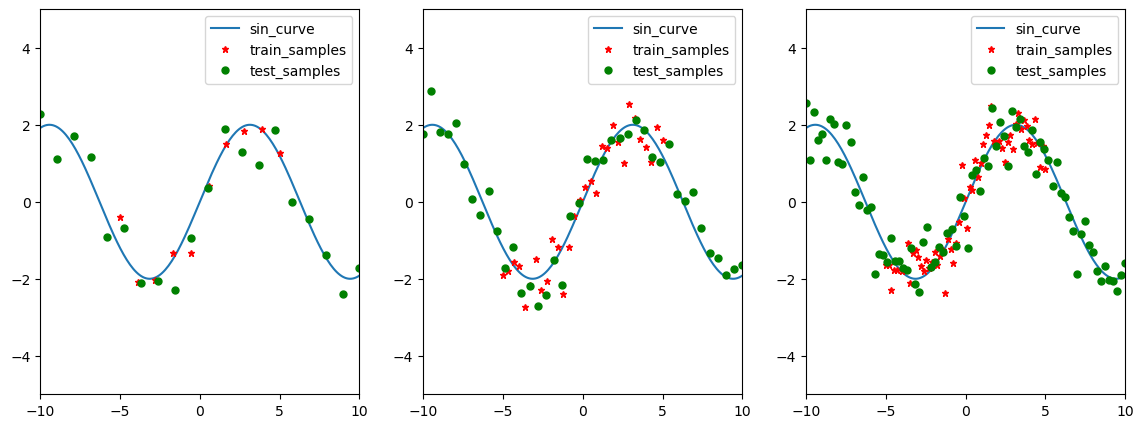

In [114]:
# sin图像
sin_x = np.linspace(-10, 10, 200)
sin_y = 2*np.sin(0.5*sin_x)

# 方便绘图
train_data = [S, M, L]
test_data = [T_S, T_M, T_L]

plt.figure(figsize=(14, 5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.plot(sin_x, sin_y, label='sin_curve')
    plt.plot(train_data[i].x, train_data[i].y, 'r*', label='train_samples', markersize=5)
    plt.plot(test_data[i].x, test_data[i].y, 'go', label='test_samples', markersize=5)
    plt.xlim((-10, 10))
    plt.ylim((-5, 5))
    plt.legend()

# 实验1.1.2 线形基函数

In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# 数据集样本和标签封装
class DataCenter:
    def __init__(self, x, y):
        # 样本特征
        self.x = x
        # 样本标签
        self.y = y

# 生成数据集
def generate_dataset(start, stop, n_samples):
    # 生成x
    x = np.linspace(start, stop, n_samples)
    # 生成y，sin(x)，并放大2倍
    y = 2*np.sin(0.5*x) + np.random.normal(0, 0.5, n_samples)
    return DataCenter(x, y)

# 生成训练数据集
def generate_train_data(start, stop, n_samples):
    train_data = []
    for n in n_samples:
        train_data.append(generate_dataset(start, stop, n))
    return train_data

# 生成测试数据集
def generate_test_data(start, stop, n_samples):
    test_data = []
    for n in n_samples:
        test_data.append(generate_dataset(start, stop, n))
    return test_data

In [117]:
# 生成训练数据
S, M, L = generate_train_data(-5, 5, [10, 30, 60])
# 生成测试数据
T_S, T_M, T_L = generate_test_data(-10, 10, [20, 40, 80])

In [118]:
# 线性基函数
def linear_basis_function(x, k):
    extend_x = np.zeros((x.shape[0], k))
    for i in range(k):
        extend_x[:, i] = np.power(x, i)
    return extend_x

# 线性回归模型
def linear_regression_model(x, y, k):
    # 样本特征扩展
    extend_x = linear_basis_function(x, k)
    # 模型
    w = np.linalg.inv(extend_x.T @ extend_x) @ extend_x.T @ y
    return w

# 预测
def predict(x, w):
    extend_x = linear_basis_function(x, w.shape[0])
    y_pred = extend_x @ w
    return y_pred

# 计算rmse
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(y_true - y_pred, 2)))

In [119]:
def train():
    epochs = 100
    k = 4
    for i in range(epochs):
        # 计算权重
        model = linear_regression_model(S.x, S.y, k)
        # 预测
        y_pred = predict(T_S.x, model)
        # 计算rmse
        rmse_a = rmse(T_S.y, y_pred)
        if i in [0, 1, 10, 50, 99]:
            show(model, k, rmse_a)
        
def show(model, k, rmse_a):
    sin_x = np.linspace(-10, 10, 200)
    sin_y = 2*np.sin(0.5*sin_x)
    plt.clf()
    plt.title(f'K={k} S RMSE={rmse_a}')
    # sin曲线
    plt.plot(sin_x, sin_y,label='sin_curve')
    # 训练样本
    plt.plot(S.x, S.y, 'r*', label='train_samples', markersize=5)
    # 测试样本
    plt.plot(T_S.x, T_S.y, 'go', label='test_samples', markersize=5)
    # 模型拟合曲线
    plt.plot(sin_x, predict(sin_x, model), label='MLE_curve')
    plt.xlim((-10, 10))
    plt.ylim((-5, 5))
    plt.show()
    plt.pause(1)

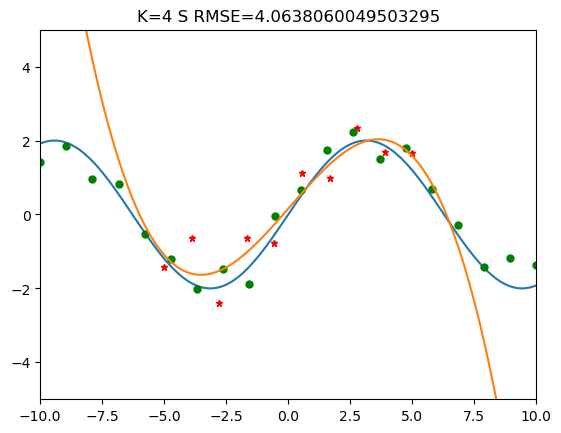

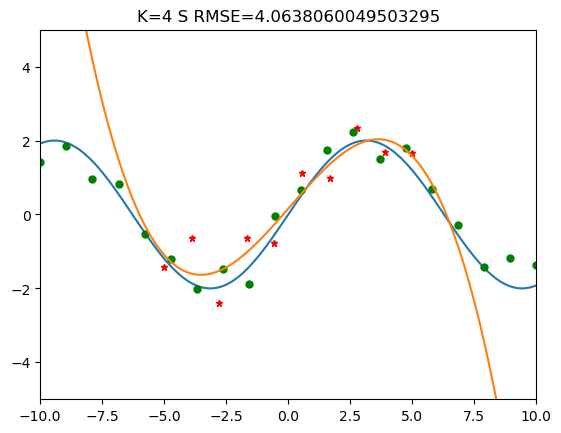

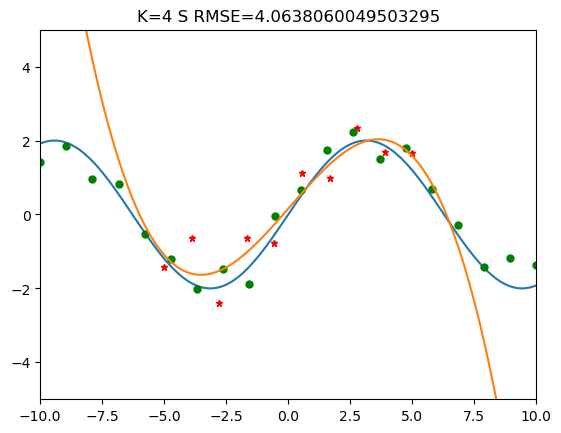

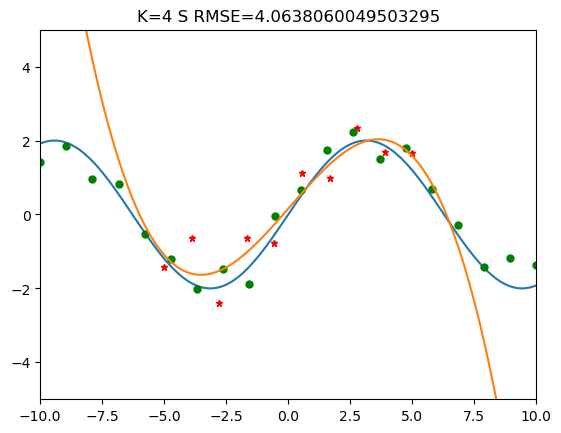

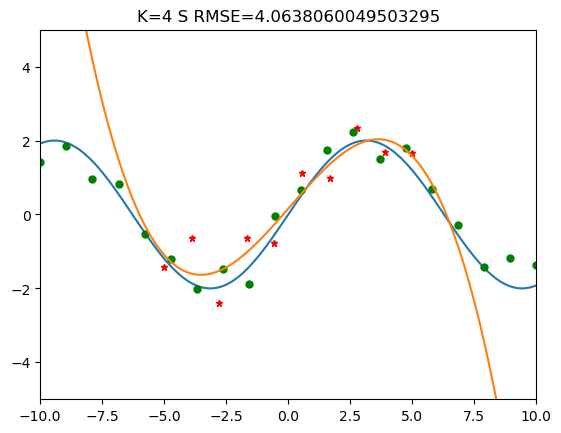

In [120]:
train()

# 实验1.1.3 K阶线性基函数

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
# 数据集样本和标签封装
class DataCenter:
    def __init__(self, x, y):
        # 样本特征
        self.x = x
        # 样本标签
        self.y = y

# 生成数据集
def generate_dataset(start, stop, n_samples):
    # 生成x
    x = np.linspace(start, stop, n_samples)
    # 生成y，sin(x)，并放大2倍
    y = 2*np.sin(0.5*x) + np.random.normal(0, 0.5, n_samples)
    return DataCenter(x, y)

# 生成训练数据集
def generate_train_data(start, stop, n_samples):
    train_data = []
    for n in n_samples:
        train_data.append(generate_dataset(start, stop, n))
    return train_data

# 生成测试数据集
def generate_test_data(start, stop, n_samples):
    test_data = []
    for n in n_samples:
        test_data.append(generate_dataset(start, stop, n))
    return test_data

In [123]:
# 生成训练数据
S, M, L = generate_train_data(-5, 5, [10, 30, 60])
# 生成测试数据
T_S, T_M, T_L = generate_test_data(-10, 10, [20, 40, 80])

In [124]:
# 线性基函数
def linear_basis_function(x, k):
    # 扩展x
    extend_x = np.zeros((x.shape[0], k))
    for i in range(k):
        extend_x[:, i] = np.power(x, i)
    return extend_x

# 线性回归模型
def linear_regression_model(x, y, k):
    # 扩展x
    extend_x = linear_basis_function(x, k)
    # 模型
    w = np.linalg.inv(extend_x.T @ extend_x) @ extend_x.T @ y
    return w

# 预测
def predict(x, w):
    extend_x = linear_basis_function(x, w.shape[0])
    y_pred = extend_x @ w
    return y_pred

# 计算rmse
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(y_true - y_pred, 2)))

In [125]:
# 方便绘图
train_data = [S, M, L]
test_data = [T_S, T_M, T_L]
data_set = ['S', 'M', 'L']

# 训练并画图
def train_and_show(K = [2, 4, 8]):
    for k in K:
        train(k)

# 对每一个k，分别在[S, M, L]上训练
def train(k):
    train_result = []
    for i in range(3):
        # 模型训练
        model = linear_regression_model(train_data[i].x, train_data[i].y, k)
        # 预测
        pred = predict(test_data[i].x, model)
        # 计算rmse
        rmse_a = rmse(test_data[i].y, pred)
        train_result.append([k, model, rmse_a])
    show(train_result)

# 对每一个k，分别画对[S, M, L]训练的结果
def show(train_result):
    sin_x = np.linspace(-10, 10, 200)
    sin_y = 2*np.sin(0.5*sin_x)
    plt.figure(figsize=(14, 5))
    for i, (k, model, rmse_a) in enumerate(train_result):
        plt.subplot(1,3,i+1)
        # 基函数阶数， 训练集， rmse
        plt.title(f'K={k} {data_set[i]} RMSE={rmse_a}')
        # sin曲线
        plt.plot(sin_x, sin_y,label='sin_curve')
        # 训练
        plt.plot(train_data[i].x, train_data[i].y, 'r*', label='train_samples', markersize=5)
        # 测试
        plt.plot(test_data[i].x, test_data[i].y, 'go', label='test_samples', markersize=5)
        # 预测
        plt.plot(sin_x, predict(sin_x, model), label='MLE_curve')
        plt.xlim((-10, 10))
        plt.ylim((-5, 5))
        plt.legend()

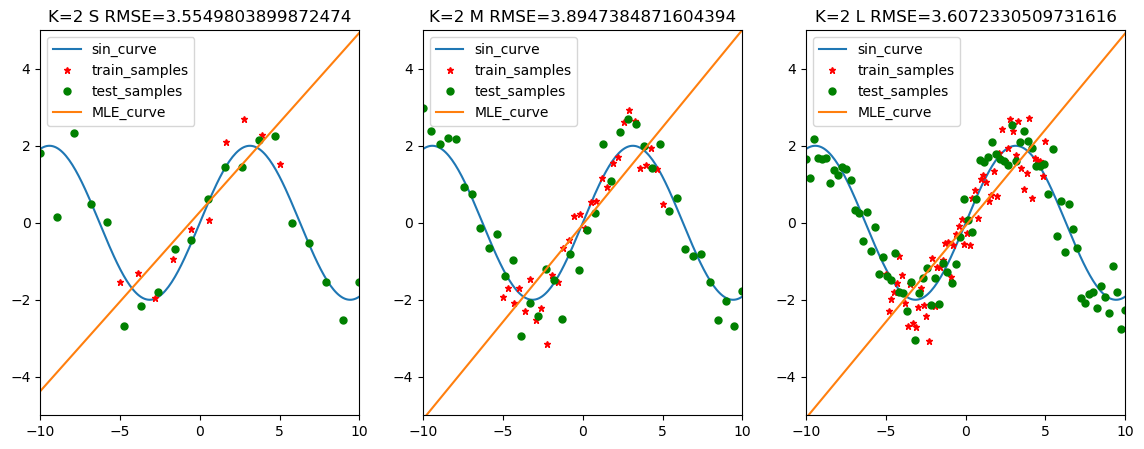

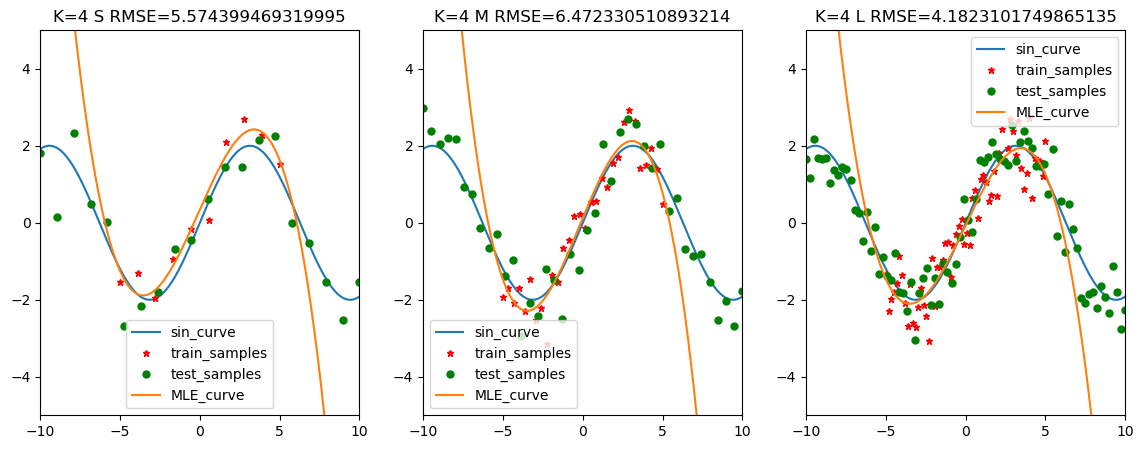

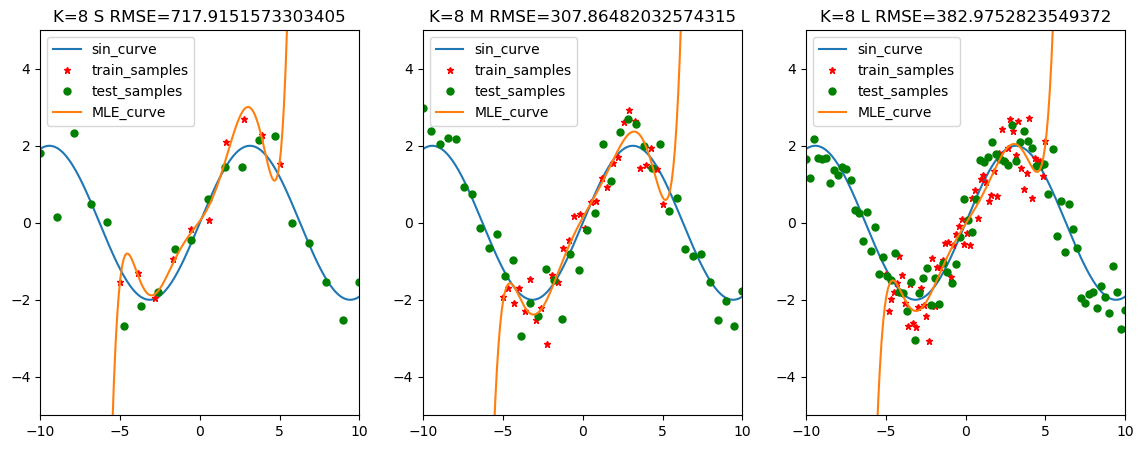

In [126]:
train_and_show()

# 实验1.2.1 二分类

In [127]:
# 样本标签名称
target_names = ['setosa', 'versicolor', 'virginica']
# 样本特征名称
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# 加载数据
def load_data():
    # 加载本地iris.csv数据
    data = np.loadtxt('iris.csv', delimiter=',', skiprows=1)
    return data

In [130]:
# 加载数据，获取前100个样本，前2个标签
data = load_data()
# 样本特征
x = data[0:100, 0:2]
# 样本标签
y = data[0:100, 4:5]
print(x.shape)
print(y.shape)

# 数据标签扩充，添加偏置
one = np.ones((x.shape[0],1))
new_x = np.hstack((one, x))

(100, 2)
(100, 1)


In [131]:
# 逻辑回归
class logistic_regression:
    def __init__(self, x, y, learning_rate=0.001, n_iters=1000):
        # 样本特征
        self.x = x
        # 样本标签
        self.y = y
        # 学习率
        self.learning_rate = learning_rate
        # 训练次数
        self.n_iters = n_iters
        # 权重
        self.weights = None
        # 损失值
        self.Loss = []
    
    # 输出
    def output(self):
        out = self.x @ self.weights
        return out

    # sigmoid激活函数
    def sigmoid(self, out):
        return 1 / (1 + np.exp(-out))

    # 计算损失值
    def compute_loss(self):
        # 计算样本和权重w
        out = self.output()
        # 计算sigmoid函数
        re = self.sigmoid(out)
        # 交叉煽损失函数
        loss = -(self.y.T @ np.log(re) + (1 - self.y.T) @ np.log(1 - re))
        # 求平均值
        loss = loss/self.x.shape[0]
        # 计算梯度
        dw = (self.x.T @ (re - self.y))
        return loss, dw
    
    # 训练
    def train(self):
        features_num = self.x.shape[1]
        # 初始化权重
        self.weights = 0.001 * np.random.randn(features_num, 1)
        self.show()
        for i in range(1, self.n_iters+1):
            loss, dw = self.compute_loss()
            # 权重更新
            self.weights -= self.learning_rate * dw
            self.Loss.append(loss)
            if i % 1000 == 0:
                self.show()
                
    def predict(self, input_x):
        pass

    def show(self):
        plt.clf()
        x1 = np.arange(4, 7.5, 0.05)
        y1 = -(self.weights[0] + self.weights[1] * x1) / self.weights[2]
        plt.plot(x1, y1)
        plt.scatter(x[0:50, 0], x[0:50, 1], marker='o', c='r')
        plt.scatter(x[50:100, 0], x[50:100, 1], marker='o', c='b')
        plt.xlabel('sepal length (cm)')
        plt.ylabel('sepal width (cm)')
        plt.show()
        plt.pause(1)

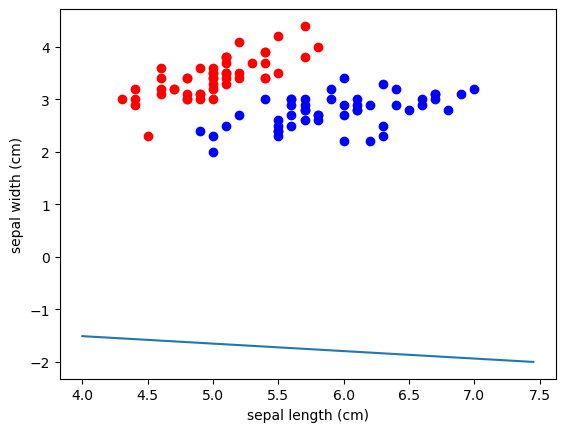

/tmp/ipykernel_787657/368373037.py:33: RuntimeWarning: divide by zero encountered in log
  loss = -(self.y.T @ np.log(re) + (1 - self.y.T) @ np.log(1 - re))
/tmp/ipykernel_787657/368373037.py:33: RuntimeWarning: invalid value encountered in matmul
  loss = -(self.y.T @ np.log(re) + (1 - self.y.T) @ np.log(1 - re))


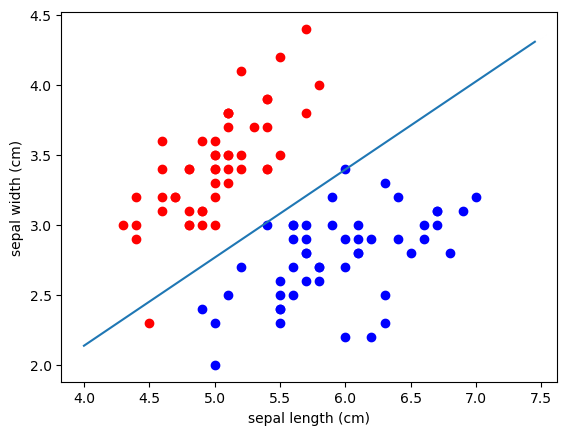

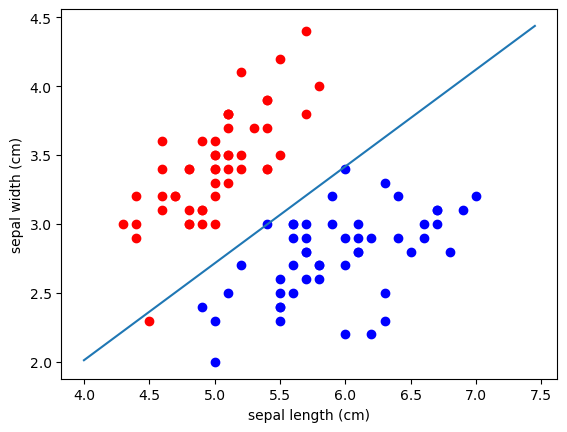

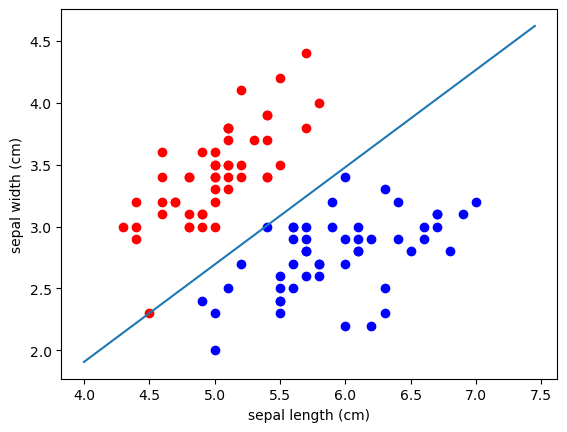

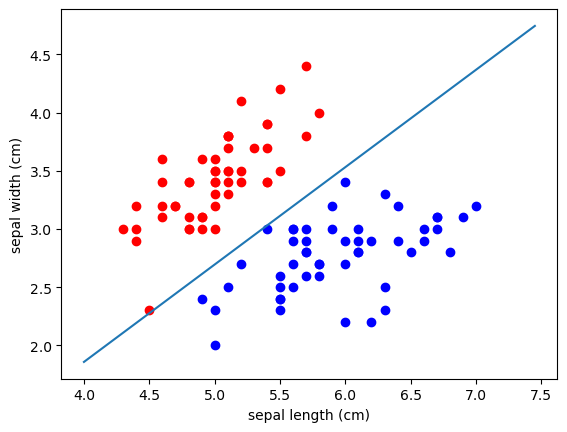

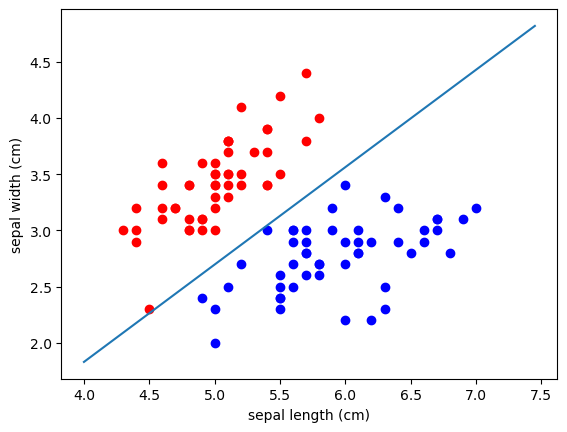

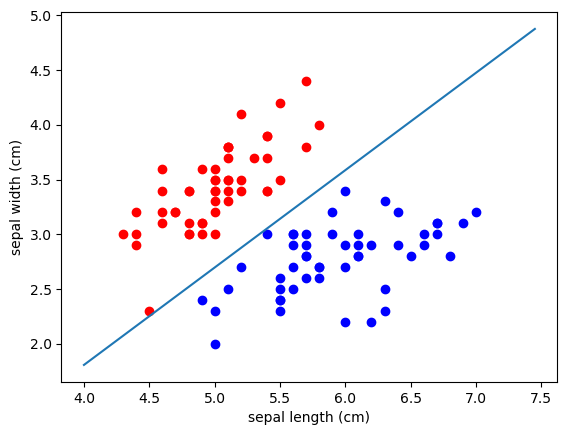

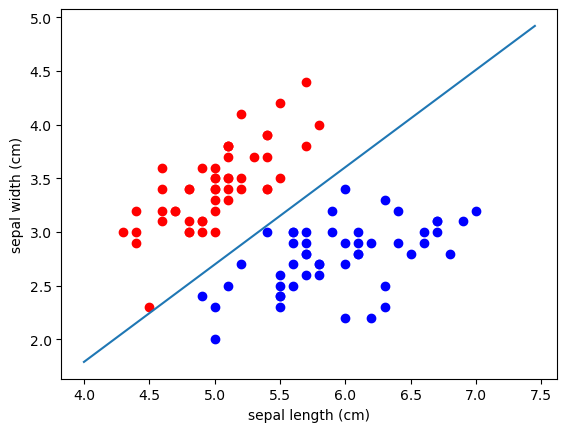

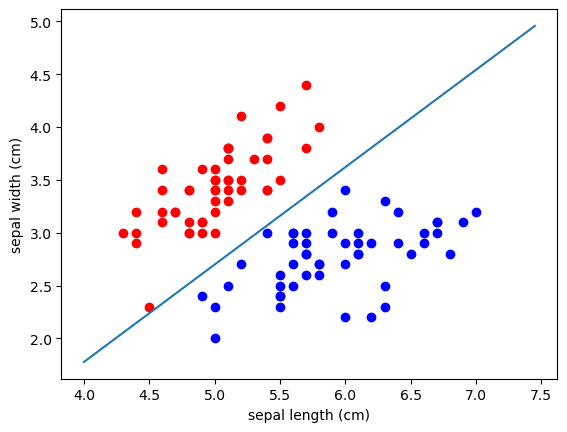

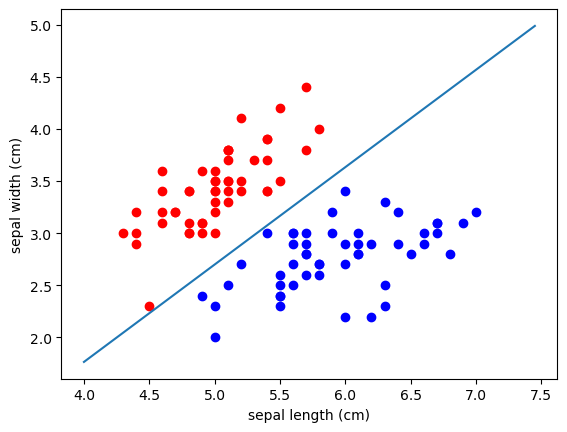

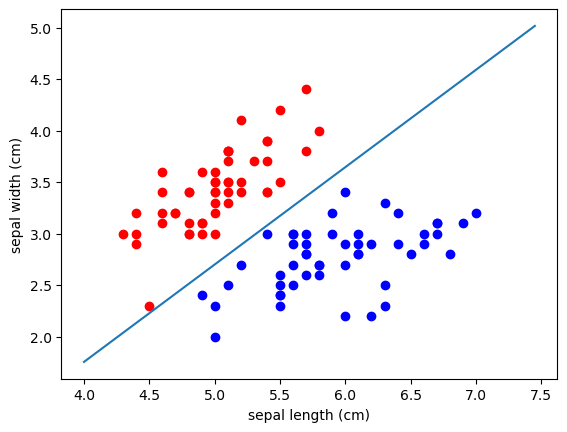

In [132]:
# 初始化logistic模型
logistic = logistic_regression(new_x, y, learning_rate=0.1, n_iters=10000)
# 训练
logistic.train()

# 实验1.2.3 三分类

In [133]:
# 样本标签名称
target_names = ['setosa', 'versicolor', 'virginica']
# 样本特征名称
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
# 加载数据
def load_data():
    # 加载本地iris.csv文件
    data = np.loadtxt('iris.csv', delimiter=',', skiprows=1)
    return data

In [136]:
# 加载数据，获取所有样本，4个标签
data = load_data()
# 样本特征
X = data[:, 0:4]
# 样本标签
Y = data[:, 4]
# 把y变为整型
Y = list(map(int, Y))
# 把标签变为onehot编码
onehot_Y = np.eye(3)[Y]

In [137]:
# softmax回归
class Softmax_Regression:
    def __init__(self, x, y):
        # 样本特征
        self.x = x
        # 样本标签
        self.y = y
        # 权重
        self.w = None
        # 损失值
        self.Loss = []
        # 准确率
        self.Accueracy = []

    # softmax函数
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z ,axis=1, keepdims=True))
        return exp_z / np.sum(exp_z,axis=1, keepdims=True)
    
    # 计算损失值和梯度
    def cross_entropy(self):
        # 计算softmax值
        y_hat = self.softmax(self.x @ self.w)
        # 计算损失值
        loss = -np.sum(self.y * np.log(y_hat))
        # 求均值
        loss = loss / self.x.shape[0]
        # 计算梯度
        wd = self.x.T @ (y_hat - self.y)
        return loss, wd
    
    def train(self, learn_rate=0.0001, epochs=1000):
        # 初始化权重
        self.w = np.random.randn(4, 3)
        for i in range(epochs):
            # 计算损失值和梯度
            loss, wd = self.cross_entropy()
            self.Loss.append(loss)
            # 计算准确率
            acc = self.compute_accuracy()
            self.Accueracy.append(acc)
            # 权重更新
            self.w -= learn_rate * wd
            if i in [0, 1, 10, 100, 500, 999]:
                print('epoch %d, loss %f, accuracy %f' % (i, loss, acc))
                
    # 预测函数
    def predict(self, x):
        return np.argmax(self.softmax(x @ self.w))
    
    # 计算准确率
    def compute_accuracy(self):
        # 计算所有样本分类正确的个数，并除以样本数量得到准确率
        return list(map(lambda x, y: self.predict([x]) == y, X, Y)).count(True) / len(X) * 100


In [138]:
# 初始化softmax regression模型
softmax = Softmax_Regression(X, onehot_Y)
# 训练
softmax.train()

epoch 0, loss 5.159582, accuracy 0.666667
epoch 1, loss 4.802228, accuracy 0.666667
epoch 10, loss 2.622674, accuracy 26.666667
epoch 100, loss 0.751647, accuracy 80.666667
epoch 500, loss 0.395901, accuracy 92.666667
epoch 999, loss 0.311258, accuracy 96.000000


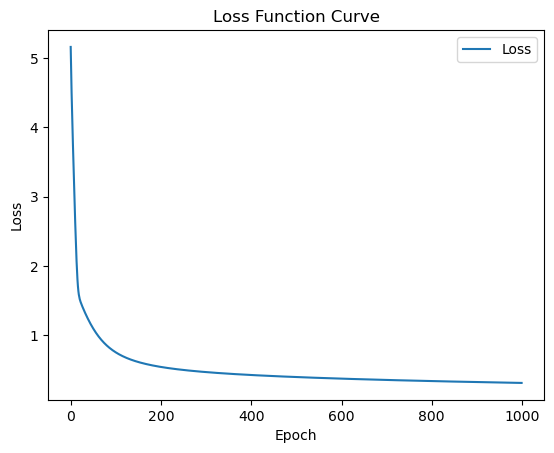

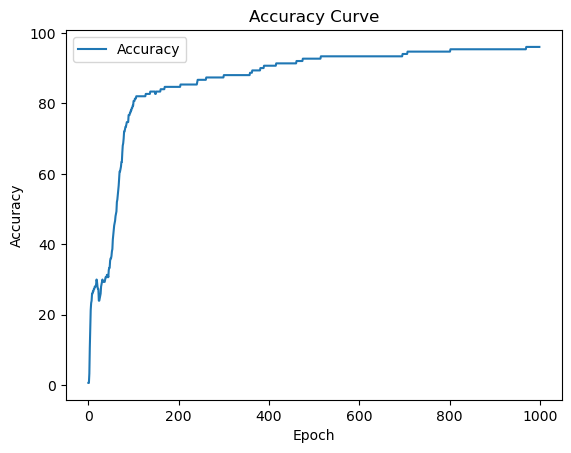

In [139]:
# 绘制训练损失值
plt.title('Loss Function Curve')  
plt.xlabel('Epoch')  
plt.ylabel('Loss') 
plt.plot(softmax.Loss, label="Loss")  
plt.legend()  
plt.show() 

# 绘制训练准确率
plt.title('Accuracy Curve')  
plt.xlabel('Epoch')  
plt.ylabel('Accuracy') 
plt.plot(softmax.Accueracy, label="Accuracy")  
plt.legend()  
plt.show()